# Learning Objectives

Towards the end of this lesson, you should be able to:
- apply different techniques to data preprocessing in Python

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

## Dealing with missing values

Read the data dictionary/description of your dataset, as missing values sometimes are filled with dummy values.
If you don't have access to the data dictionary, look at the descriptive statistics (mean, min, max) or make use of visualizations to try and make sense of the data. 

In [3]:
age = pd.Series([18,18,19,20,np.nan,14,np.nan])
gender = pd.Series(['male', 'male', 'female', 'female', 'male', 'female', 'male'])

df = pd.DataFrame({'age':age, 'gender':gender})
df

,age,gender
0,18.0,male
1,18.0,male
2,19.0,female
3,20.0,female
4,NaN,male
5,14.0,female
6,NaN,male


In [4]:
# Number of NAs in dataframe by column

df.isna().sum()

age       2
gender    0
dtype: int64

In [5]:
# drop all NA for the column gender

df1 = df.copy() # we don't want the original df to be destroyed
df1.dropna(subset=['gender']) # only drop the column if the column gender has NaN

,age,gender
0,18.0,male
1,18.0,male
2,19.0,female
3,20.0,female
4,NaN,male
5,14.0,female
6,NaN,male


In [6]:
# There are a few ways to deal with missing values, you can either drop all rows containing NA or impute them.
# There are multiple imputation methods (fill with median, MICE...etc) (read more: https://scikit-learn.org/stable/modules/impute.html)
# There are different types of missing data (Missing at random, missing completely at random ...etc)
# Deal with NA accordingly

# create a copy of df and name it df1, then drop all na. 
df1 = df.dropna(subset=['gender'])
    
# create a copy of df and name it df2, then fill NA with median of each feature
df2 = df.fillna(0) # fill NA with median of each feature

In [7]:
df1

,age,gender
0,18.0,male
1,18.0,male
2,19.0,female
3,20.0,female
4,NaN,male
5,14.0,female
6,NaN,male


In [8]:
df2

,age,gender
0,18.0,male
1,18.0,male
2,19.0,female
3,20.0,female
4,0.0,male
5,14.0,female
6,0.0,male


## Dealing with duplicated data

In [9]:
df

,age,gender
0,18.0,male
1,18.0,male
2,19.0,female
3,20.0,female
4,NaN,male
5,14.0,female
6,NaN,male


In [10]:
# Drop all the duplicated data...
df[~df.duplicated()]

# or
df.drop_duplicates()

,age,gender
0,18.0,male
2,19.0,female
3,20.0,female
4,NaN,male
5,14.0,female


## Dealing with inconsistencies and noisy data

There are many type of inconsistencies and noise in data.

#### For instance, we know for a fact that some features aren't suppose to have negative values

In [11]:
age = pd.Series([24,21,24,-26,27])
income = pd.Series([3000,2500,3400,4599, -9999])

df = pd.DataFrame({"age":age, "income":income})
df

,age,income
0,24,3000
1,21,2500
2,24,3400
3,-26,4599
4,27,-9999


In [12]:
# Perform data cleaning on the above pandas series using Regex
# Replace negative values with nan for age and income

age = age.map(lambda x: np.nan if x < 0 else x)
income = income.map(lambda x: np.nan if x < 0 else x)

In [13]:
age

0    24.0
1    21.0
2    24.0
3     NaN
4    27.0
dtype: float64

In [14]:
income

0    3000.0
1    2500.0
2    3400.0
3    4599.0
4       NaN
dtype: float64

In [15]:
# replace all values <0 to 0
df = df.clip(lower = 0)

In [16]:
# replace all values >3000 to 3000
df = df.clip(upper = 3000)

In [17]:
df

,age,income
0,24,3000
1,21,2500
2,24,3000
3,0,3000
4,27,0


#### Cleaning Texts

In [18]:
import re

txt = "The rain in Malaysia"
x = re.search("^The.*Mal*", txt)
x

<re.Match object; span=(0, 15), match='The rain in Mal'>

In [19]:
x = re.search("Portugal", txt)
print(x)

None


Some RegEx commands

<img src="regex.png" style="height: 400px;" align=left>  



In [20]:
state = pd.Series(["\tJohor,Bahru\n\t", "Sela   ngor\n\t", " Sabah     ", "Sarawak`", "Penang", "123Kel3antan4", "Ke_dah", "Pahan?g"])
state

0    \tJohor,Bahru\n\t
1      Sela   ngor\n\t
2           Sabah     
3             Sarawak`
4               Penang
5        123Kel3antan4
6               Ke_dah
7              Pahan?g
dtype: object

In [21]:
# replace all characters/commands that are not a-z and A-Z

state = pd.Series(["\tJohor,Bahru\n\t", "Sela   ngor\n\t", " Sabah     ", "Sarawak`", "Penang", "123Kel3antan4", "Ke_dah", "Pahan?g"])
state = state.replace("[^a-zA-Z]", "", regex = True)
state

0    JohorBahru
1      Selangor
2         Sabah
3       Sarawak
4        Penang
5      Kelantan
6         Kedah
7        Pahang
dtype: object

In [22]:
# Regular Expressions (regex) is super useful in cleaning out strings.

state = pd.Series(["\tJohor,Bahru\n\t", "Sela   ngor\n\t", " Sabah     ", "Sarawak`", "Penang", "123Kel3antan4", "Ke_dah", "Pahan?g"])
state = state.replace("\s", "", regex = True) # remove all whitespace, works even if the whitespace is in the center
state

0      Johor,Bahru
1         Selangor
2            Sabah
3         Sarawak`
4           Penang
5    123Kel3antan4
6           Ke_dah
7          Pahan?g
dtype: object

In [23]:
# there are many ways we can clean this data using regex, since we know the state only consist of alphabets we can do:

state = pd.Series(["\tJohor,Bahru\n\t", "Sela   ngor\n\t", " Sabah     ", "Sarawak`", "Penang", "123Kel3antan4", "Ke_dah", "Pahan?g"])
state = state.replace("[^a-zA-Z]", "", regex = True).replace("JohorBahru", "Johor Bahru")
state

0    Johor Bahru
1       Selangor
2          Sabah
3        Sarawak
4         Penang
5       Kelantan
6          Kedah
7         Pahang
dtype: object

# Data Normalization and Standardization

#### Most common normalization techniques are
- Min-max
- Z-score normalization (Standardization)

#### Min-max will transform your data into a distribution of [0,1]
#### Standardization will transform your data such that the mean is 0 and standard deviation is 1.

In [3]:
from sklearn.preprocessing import StandardScaler  # z-score / standardization
from sklearn.preprocessing import MinMaxScaler # min max

In [4]:
df = pd.DataFrame({"height_cm": [180,165,170,164,161,183], "weight_kgs": [60,50,43,46,55,76]})
df["height_ft"] = df["height_cm"]*0.0328084

In [5]:
df

,height_cm,weight_kgs,height_ft
0,180,60,5.905512
1,165,50,5.413386
2,170,43,5.577428
3,164,46,5.380578
4,161,55,5.282152
5,183,76,6.003937


#### Min-Max

In [6]:
# Min Max
features_to_scale = ["height_cm", "height_ft", "weight_kgs"]
to_scale = df[features_to_scale]

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(to_scale)
x_scaled = pd.DataFrame(x_scaled, columns = features_to_scale)
x_scaled

,height_cm,height_ft,weight_kgs
0,0.863636,0.863636,0.515152
1,0.181818,0.181818,0.212121
2,0.409091,0.409091,0.000000
3,0.136364,0.136364,0.090909
4,0.000000,0.000000,0.363636
5,1.000000,1.000000,1.000000


In [8]:
# height = 172
# weight = 52
# hight = 5.5

# this is for new data...

df_new = pd.DataFrame({"height_cm": [172],
                     "height_ft": [5.5],
                     "weight_kgs": [52]})

df_new
min_max_scaler.transform(df_new)

array([[0.5       , 0.30181794, 0.27272727]])

#### Z-Score (Standardization)

In [11]:
# Z-Score
features_to_scale = ["height_cm", "height_ft", "weight_kgs"]
to_scale = df[features_to_scale]

standard_scaler = StandardScaler()
x_scaled = standard_scaler.fit_transform(to_scale)
x_scaled = pd.DataFrame(x_scaled, columns = features_to_scale)

In [12]:
x_scaled

,height_cm,height_ft,weight_kgs
0,1.149932,1.149932,0.457709
1,-0.665750,-0.665750,-0.457709
2,-0.060523,-0.060523,-1.098501
3,-0.786796,-0.786796,-0.823876
4,-1.149932,-1.149932,0.000000
5,1.513069,1.513069,1.922376


In [13]:
df_new = pd.DataFrame({"height_cm": [172],
                     "height_ft": [5.5],
                     "weight_kgs": [52]})

df_new
standard_scaler.transform(df_new)

array([[ 0.18156826, -0.3461908 , -0.27462519]])

## Discretization

#### Discretizing time of day into labels

In [30]:
timestamp = pd.date_range("2020-06-22 05:00:00", "2020-06-22 23:59:59", freq='H')

In [31]:
df = pd.DataFrame({"timestamp":timestamp, "date":timestamp.date, "hour_of_day":timestamp.hour})

In [32]:
df

,timestamp,date,hour_of_day
0,2020-06-22 05:00:00,2020-06-22,5
1,2020-06-22 06:00:00,2020-06-22,6
2,2020-06-22 07:00:00,2020-06-22,7
3,2020-06-22 08:00:00,2020-06-22,8
4,2020-06-22 09:00:00,2020-06-22,9
5,2020-06-22 10:00:00,2020-06-22,10
6,2020-06-22 11:00:00,2020-06-22,11
7,2020-06-22 12:00:00,2020-06-22,12
8,2020-06-22 13:00:00,2020-06-22,13
9,2020-06-22 14:00:00,2020-06-22,14


In [33]:
df["parts_of_day"] = pd.cut(df["hour_of_day"], bins=[-1,11,17,23], labels=["Morning", "Afternoon", "Evening"])

In [34]:
df

,timestamp,date,hour_of_day,parts_of_day
0,2020-06-22 05:00:00,2020-06-22,5,Morning
1,2020-06-22 06:00:00,2020-06-22,6,Morning
2,2020-06-22 07:00:00,2020-06-22,7,Morning
3,2020-06-22 08:00:00,2020-06-22,8,Morning
4,2020-06-22 09:00:00,2020-06-22,9,Morning
5,2020-06-22 10:00:00,2020-06-22,10,Morning
6,2020-06-22 11:00:00,2020-06-22,11,Morning
7,2020-06-22 12:00:00,2020-06-22,12,Afternoon
8,2020-06-22 13:00:00,2020-06-22,13,Afternoon
9,2020-06-22 14:00:00,2020-06-22,14,Afternoon


#### Or maybe discretizing income groups

In [35]:
income = pd.Series([3000,4000,3400,5900,4500, 10000, 4900, 12000])

In [36]:
income

0     3000
1     4000
2     3400
3     5900
4     4500
5    10000
6     4900
7    12000
dtype: int64

In [37]:
income_group = income.map(lambda x: "high" if x > 5000 else "low")

In [38]:
pd.DataFrame({"income": income, "income_group": income_group})

,income,income_group
0,3000,low
1,4000,low
2,3400,low
3,5900,high
4,4500,low
5,10000,high
6,4900,low
7,12000,high


## Data Aggregation

In [39]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'foo'], 
                   'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'], 
                   'C': np.random.random_sample(8)*1000, 
                   'D': np.random.random_sample(8)*100})

In [40]:
df

,A,B,C,D
0,foo,one,363.171650,23.670556
1,bar,one,260.264944,57.783584
2,foo,two,785.527883,68.158759
3,bar,three,597.862938,42.310235
4,foo,two,764.404520,94.680912
5,bar,two,680.322857,63.498562
6,foo,one,834.752967,19.397100
7,foo,three,874.273474,23.443560


In [41]:
# Group by category A, aggregate C and D by mean
df.groupby("A").mean()    

,C,D
A,,
bar,512.816913,54.530794
foo,724.426099,45.870177


In [42]:
# Group by category A, aggregate C and D by sum
df.groupby("A").sum()

,C,D
A,,
bar,1538.450739,163.592382
foo,3622.130493,229.350887


In [43]:
# Group by category A, aggregate C by mean and D by sum
df.groupby("A").agg({"C":"mean", "D":"sum"})

,C,D
A,,
bar,512.816913,163.592382
foo,724.426099,229.350887


In [44]:
# Group by category A and B, aggregate C & D by sum
df.groupby(["A","B"]).sum()

C           D
A   B                             
bar one     260.264944   57.783584
    three   597.862938   42.310235
    two     680.322857   63.498562
foo one    1197.924617   43.067657
    three   874.273474   23.443560
    two    1549.932403  162.839671

## Merging Data

Can use pandas.merge() to do a join (inner, outer, left, right) by key, or simply use pandas.concat() to concatenate by row or column

In [45]:
df = pd.DataFrame({'key': ['key_1', 'key_2', 'key_3'], 
                   'B': np.random.random_sample(3)*1000})
                   
df2 = pd.DataFrame({'key': ['key_1', 'key_2', 'key_3', 'key_4'], 
                   'C': np.random.random_sample(4)*100})
                    
display(df)
df2

,key,B
0,key_1,646.704099
1,key_2,816.101977
2,key_3,857.333565


,key,C
0,key_1,77.545217
1,key_2,67.137918
2,key_3,77.965712
3,key_4,6.707060


#### merge by key

In [46]:
df.merge(df2, on="key", how="outer") # same concept as sql joins

,key,B,C
0,key_1,646.704099,77.545217
1,key_2,816.101977,67.137918
2,key_3,857.333565,77.965712
3,key_4,NaN,6.707060


#### concat simply adds the data in

In [47]:
pd.concat([df,df2], sort=True, axis=0) # by row

,B,C,key
0,646.704099,NaN,key_1
1,816.101977,NaN,key_2
2,857.333565,NaN,key_3
0,NaN,77.545217,key_1
1,NaN,67.137918,key_2
2,NaN,77.965712,key_3
3,NaN,6.707060,key_4


In [48]:
pd.concat([df,df2], sort=True, axis=1) # by column

,key,B,key,C
0,key_1,646.704099,key_1,77.545217
1,key_2,816.101977,key_2,67.137918
2,key_3,857.333565,key_3,77.965712
3,NaN,NaN,key_4,6.707060


## Dealing with imbalance data
Two ways of dealing with imbalance data
- Oversampling the minority class
- Undersampling the majority class

There are also a few ways of oversampling and undersampling.
#### Oversampling
- Random Oversampling (Randomly selecting samples from the minority class and adding into the training set, can cause overfitting)
- Generating synthetic data (SMOTE)

#### Undersampling
- Random Under-sampling (Randomly removing samples from the majority class - loss of information)
- Edited Nearest Neighbor

For more information: https://imbalanced-learn.readthedocs.io/en/stable/api.html

In [58]:
!pip install imblearn

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [1]:
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set()

In [49]:
bc = datasets.load_breast_cancer(return_X_y = True, as_frame=True)
bc = pd.concat([bc[0], bc[1]], 1)

C:\Users\USER\AppData\Local\Temp/ipykernel_30272/11753127.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  bc = pd.concat([bc[0], bc[1]], 1)


In [50]:
bc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


1    357
0    212
Name: target, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

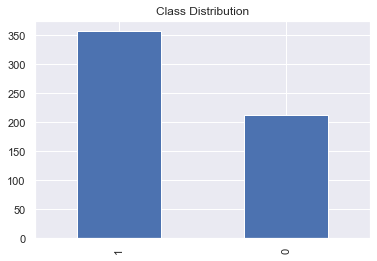

In [51]:
print(bc["target"].value_counts())
bc["target"].value_counts().plot(kind="bar")
plt.title("Class Distribution")

In [52]:
# SMOTE

# Since all features are numeric, we'll use SMOTE. If there are categorical data in the dataset, SMOTENC can be used.
# Read the docs
smt = imblearn.over_sampling.SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=5)

In [53]:
# SMOTE uses knn to find nearest neighbor, so it might be a good idea to normalize the data beforehand.

# Min Max
X = bc.drop("target", 1)
y = bc["target"]
features = X.columns

min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
x_scaled = pd.DataFrame(x_scaled, columns = features)
x_scaled.head(2)

C:\Users\USER\AppData\Local\Temp/ipykernel_30272/1748966040.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = bc.drop("target", 1)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878


In [54]:
# Fit smote
X_res, y_res = smt.fit_resample(x_scaled, y)

0    357
1    357
Name: target, dtype: int64


Text(0.5, 1.0, 'Class Distribution')

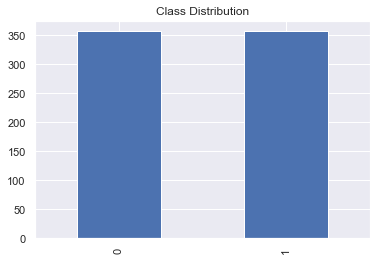

In [55]:
# after oversampling with SMOTE
print(y_res.value_counts())
y_res.value_counts().plot(kind="bar")
plt.title("Class Distribution")

## Data Reduction

#### Chi-squared test

In [56]:
from sklearn.feature_selection import chi2 # chi-squared test
from sklearn.feature_selection import SelectKBest

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

In [59]:
# Continue using variables from oversampling (X_res, y_res)
select_feature = SelectKBest(chi2, k = 5).fit(X_res, y_res) # top 5

kbest = np.asarray(X_res.columns)[select_feature.get_support()]
kbest

array(['mean concavity', 'mean concave points', 'worst radius',
       'worst perimeter', 'worst concave points'], dtype=object)

<AxesSubplot:xlabel='score', ylabel='Feature'>

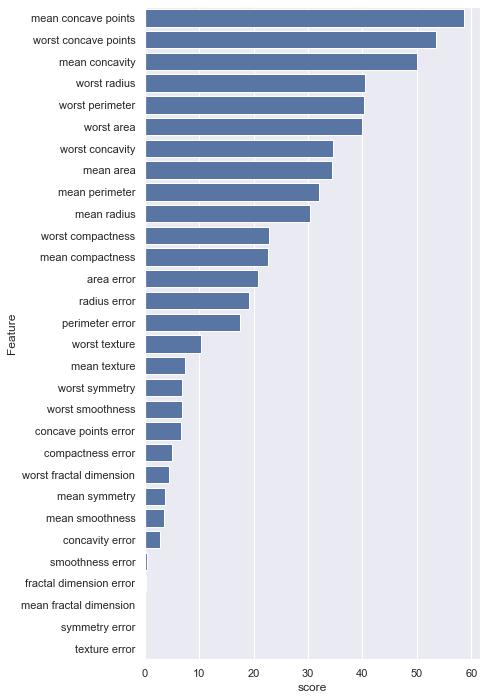

In [61]:
score = pd.DataFrame(select_feature.scores_ , X_res.columns).sort_values(0, ascending=False).reset_index().rename(columns={0:"score", "index":"Feature"})

f, ax = plt.subplots(figsize=(6,12))

sns.barplot(data = score, x = "score", y = "Feature", color = "b")

# Correlation

Identify Highly Correlated Features

<AxesSubplot:>

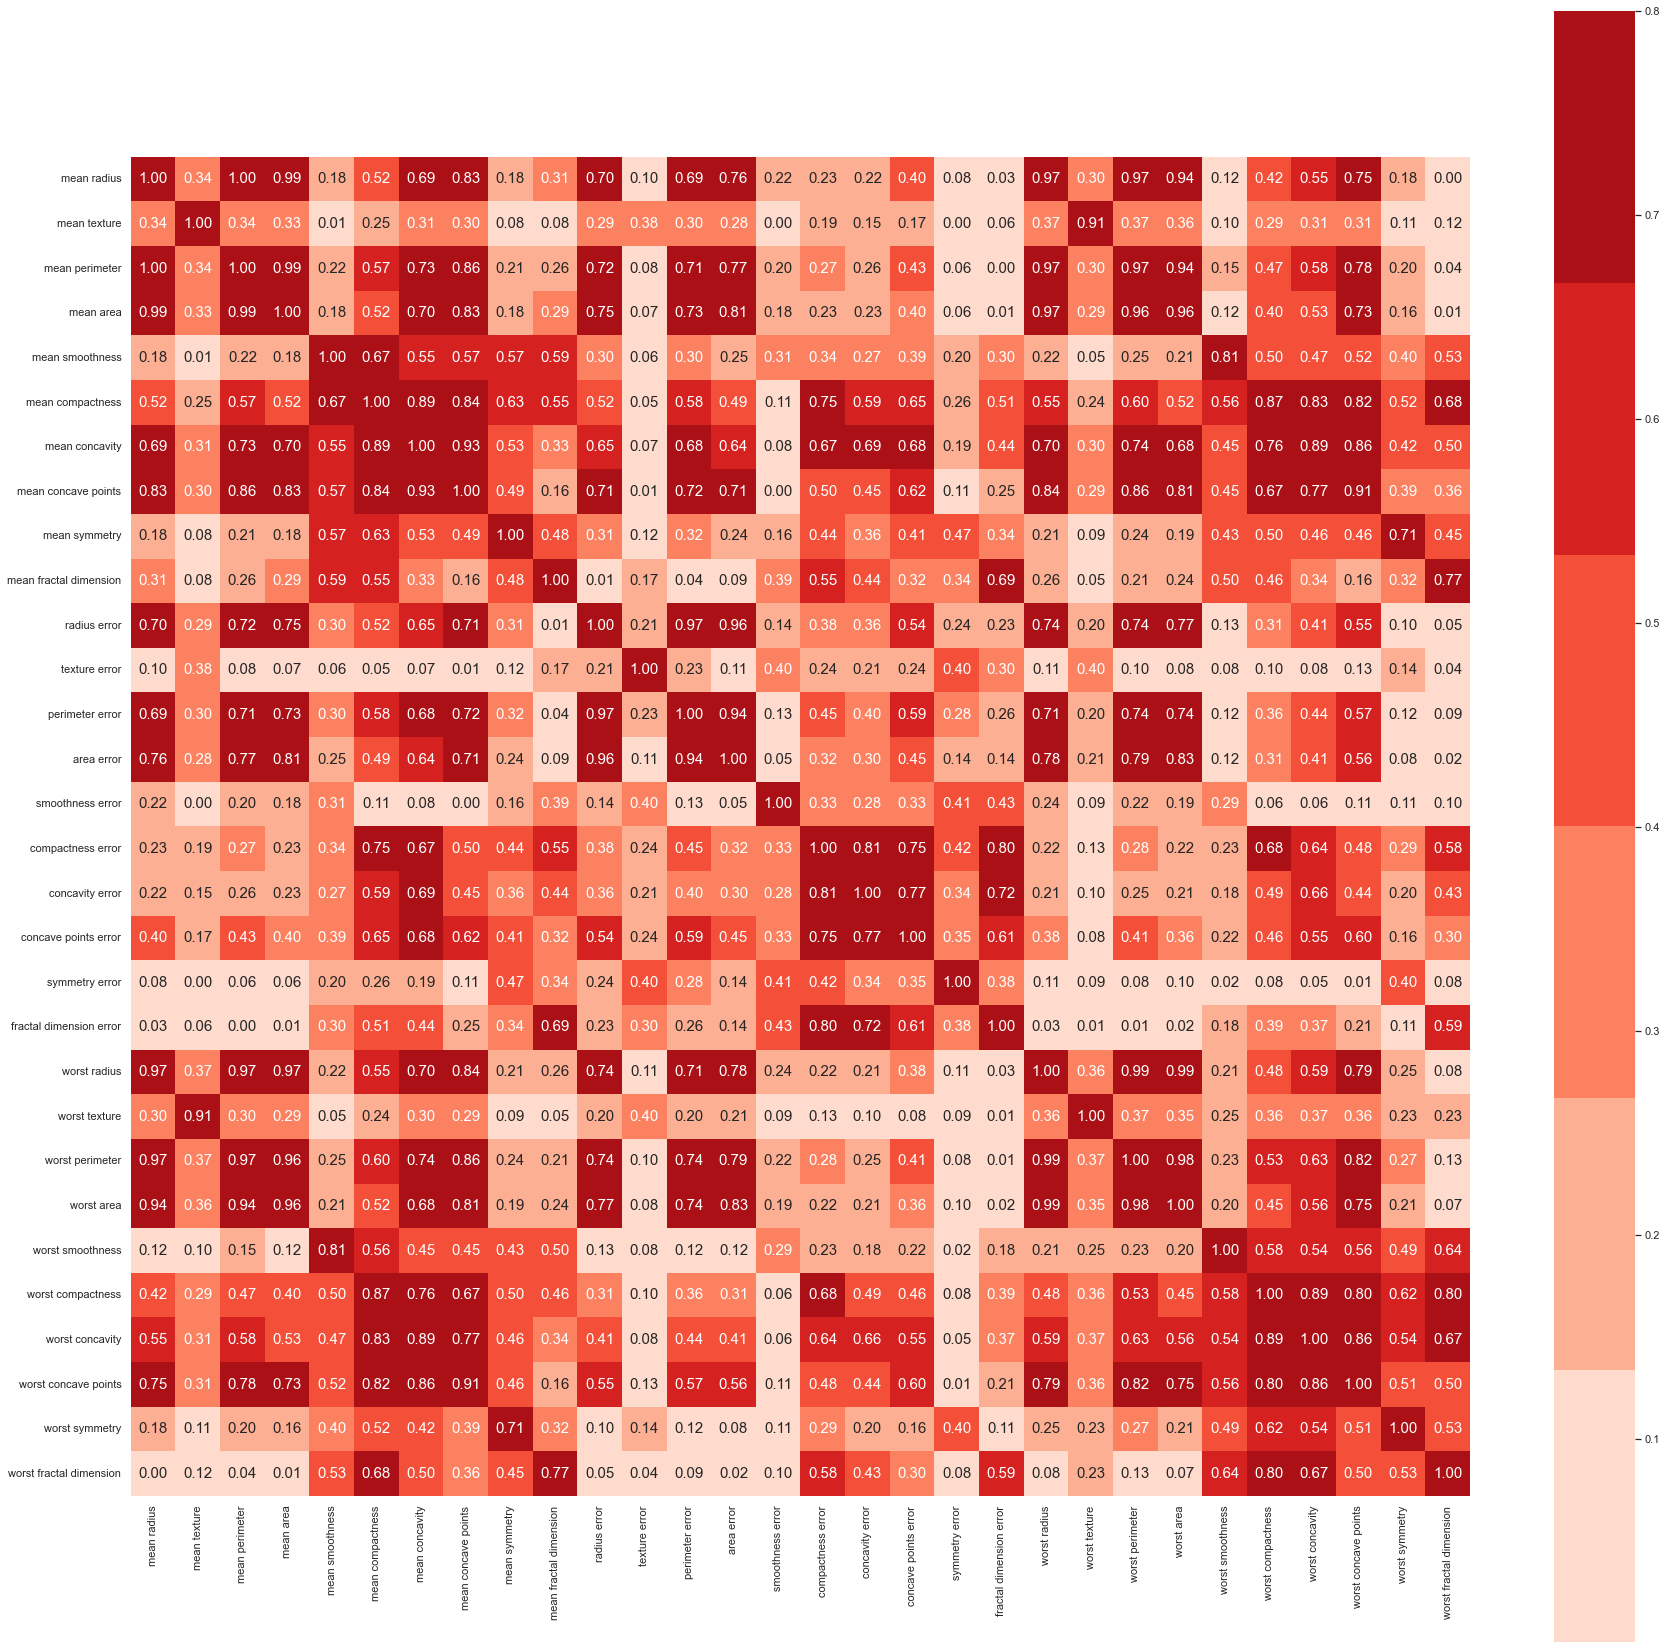

In [62]:
corr_matrix  = X_res.corr().abs()

plt.figure(figsize=(30,30))
sns.heatmap(corr_matrix , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds"))

In [63]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

C:\Users\USER\AppData\Local\Temp/ipykernel_30272/1276100424.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


In [64]:
to_drop

['mean perimeter',
 'mean area',
 'perimeter error',
 'area error',
 'worst radius',
 'worst perimeter',
 'worst area']

# Label Encode New Data

## Load Libraries


In [18]:
import pandas as pd
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

## Create a DataFrame

In [19]:
df = pd.DataFrame({'GENDER': {0: 'M',
  1: 'F',
  2: 'M',
  3: 'M',
  4: 'F',
  5: 'F',
  6: 'M',
  7: 'F',
  8: 'M',
  9: 'F'},
 'MONTH': {0: 'JAN',
  1: 'FEB',
  2: 'JAN',
  3: 'MARCH',
  4: 'FEB',
  5: 'JUNE',
  6: 'AUGUST',
  7: 'FEB',
  8: 'JAN',
  9: 'FEB'},
 'CITY': {0: 'KL',
  1: 'KEDAH',
  2: 'SELANGOR',
  3: 'PINENG',
  4: 'PERLIS',
  5: 'JOHOR',
  6: 'KEDAH',
  7: 'SELANGOR',
  8: 'KL',
  9: 'PERAK'},
 'OCCUPATION': {0: 'MANAGER',
  1: 'DOCTOR',
  2: 'EXECUTIVE',
  3: 'CLERK',
  4: 'LECTURER',
  5: 'SUPERVISOR',
  6: 'CLEANER',
  7: 'TAILOR',
  8: 'TEACHER',
  9: 'PILOT'},
 'SUSPICIOUS': {0: 'Y',
  1: 'Y',
  2: 'N',
  3: 'Y',
  4: 'N',
  5: 'N',
  6: 'N',
  7: 'Y',
  8: 'N',
  9: 'Y'}})

df

,GENDER,MONTH,CITY,OCCUPATION,SUSPICIOUS
0,M,JAN,KL,MANAGER,Y
1,F,FEB,KEDAH,DOCTOR,Y
2,M,JAN,SELANGOR,EXECUTIVE,N
3,M,MARCH,PINENG,CLERK,Y
4,F,FEB,PERLIS,LECTURER,N
5,F,JUNE,JOHOR,SUPERVISOR,N
6,M,AUGUST,KEDAH,CLEANER,N
7,F,FEB,SELANGOR,TAILOR,Y
8,M,JAN,KL,TEACHER,N
9,F,FEB,PERAK,PILOT,Y


## Label Encode the Dataset

In [20]:
# Encoding the variable
d = defaultdict(LabelEncoder)

fit = df.apply(lambda x: d[x.name].fit_transform(x))
fit

,GENDER,MONTH,CITY,OCCUPATION,SUSPICIOUS
0,1,2,2,5,1
1,0,1,1,2,1
2,1,2,6,3,0
3,1,4,5,1,1
4,0,1,4,4,0
5,0,3,0,7,0
6,1,0,1,0,0
7,0,1,6,8,1
8,1,2,2,9,0
9,0,1,3,6,1


In [21]:
# Inverse the encoded
fit.apply(lambda x: d[x.name].inverse_transform(x))

,GENDER,MONTH,CITY,OCCUPATION,SUSPICIOUS
0,M,JAN,KL,MANAGER,Y
1,F,FEB,KEDAH,DOCTOR,Y
2,M,JAN,SELANGOR,EXECUTIVE,N
3,M,MARCH,PINENG,CLERK,Y
4,F,FEB,PERLIS,LECTURER,N
5,F,JUNE,JOHOR,SUPERVISOR,N
6,M,AUGUST,KEDAH,CLEANER,N
7,F,FEB,SELANGOR,TAILOR,Y
8,M,JAN,KL,TEACHER,N
9,F,FEB,PERAK,PILOT,Y


## New Data

In [22]:
newData = pd.DataFrame({
    'GENDER':['F'],
    'MONTH':['FEB'],
    'CITY':['KL']
})

newData

,GENDER,MONTH,CITY
0,F,FEB,KL


In [23]:
# Using the dictionary to label future data

newData.apply(lambda x: d[x.name].transform(x))

,GENDER,MONTH,CITY
0,0,1,2
